In [1]:
# Import libraries.
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

**Read in the Dataset**

In [2]:
# Create a mount to Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the dataset
X = np.load('/content/drive/My Drive/Colab Notebooks/images.npy')

In [4]:
# Read in the dataset labels
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Labels.csv')
y = np.array(labels['Label'])

**Inspect the Dataset**

In [5]:
# Print the shape of the dataset.
X.shape

(4750, 128, 128, 3)

In [6]:
# Print the shape of the labels.
y.shape

(4750,)

The dataset is already in the correct shape and does not need to be adjusted (4 dimensions - number of images,128 x 128 x 3(RBG)).

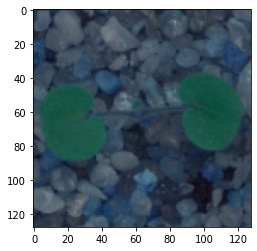

In [7]:
# Visualize images before Gaussian blurring.
plt.imshow(X[0])

In [8]:
# Pre-process images with Gaussian blurring.
for i, image in enumerate(X):
    X[i] = cv2.GaussianBlur(image, (7, 7), 0)

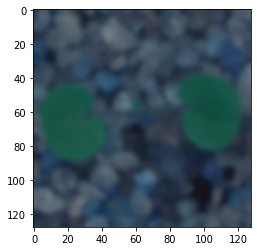

In [9]:
# Inspect image after Gaussian blurring.
plt.imshow(X[0])

**Split the data into training, validation, and test sets**

In [10]:
# Define test and training sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Define validation sets, redefine training sets.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=.5, random_state=1)

**Normalize the Data**

In [11]:
# Convert data points to float32, normal RGB values to be between 0 and 1.

# Training Set.
X_train = X_train.astype('float32')
X_train /= 255

# Validation Set.
X_validation = X_validation.astype('float32')
X_validation /= 255

# Test Set.
X_test = X_test.astype('float32')
X_test /= 255

In [12]:
# Convert Labels to Categorical datatype

# Create Encoder instance
encoder = LabelEncoder()

# Training Set.
y_train = encoder.fit_transform(y_train)
y_train = to_categorical(y_train, num_classes=12)

# Validation Set.
y_validation = encoder.fit_transform(y_validation)
y_validation = to_categorical(y_validation, num_classes=12) 

# Test Set.
y_test = encoder.fit_transform(y_test)
y_test = to_categorical(y_test, num_classes=12)

**Inspect the Data after Normalization**

In [13]:
def print_set_shapes(dataset, label_set):
    print("Dataset Shape:", dataset.shape)
    print("Labels Shape:", label_set.shape)
    print("Number of Images:", dataset.shape[0])
    print("Max value:", dataset.max())
    print("Min value:", dataset.min())
    print("")

print("Training Set:")
print_set_shapes(X_train, y_train)

print("Validation Set:")
print_set_shapes(X_validation, y_validation)

print("Test Set:")
print_set_shapes(X_test, y_test)

Training Set:
Dataset Shape: (1662, 128, 128, 3)
Labels Shape: (1662, 12)
Number of Images: 1662
Max value: 0.99607843
Min value: 0.0

Validation Set:
Dataset Shape: (1663, 128, 128, 3)
Labels Shape: (1663, 12)
Number of Images: 1663
Max value: 0.99607843
Min value: 0.0

Test Set:
Dataset Shape: (1425, 128, 128, 3)
Labels Shape: (1425, 12)
Number of Images: 1425
Max value: 0.99607843
Min value: 0.0



In [14]:
# Check value of y_train[0]
print("Value of y_train[0]:\n", y_train[0])

Value of y_train[0]:
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Build a Sequential model**

In [15]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from keras.layers import Dense, Activation, Flatten, InputLayer, MaxPooling2D

# Define the model architecture.
model = Sequential()
model.add(InputLayer(input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(12, activation="softmax"))

**Fit the Model**

In [16]:
# Compile the model.
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model.
model.fit(x=X_train, y=y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
52/52 [==============================] - 35s 59ms/step - loss: 2.4524 - accuracy: 0.1215 - val_loss: 2.3335 - val_accuracy: 0.2099
Epoch 2/10
52/52 [==============================] - 2s 40ms/step - loss: 1.9020 - accuracy: 0.3412 - val_loss: 1.6269 - val_accuracy: 0.4041
Epoch 3/10
52/52 [==============================] - 2s 40ms/step - loss: 1.5177 - accuracy: 0.4621 - val_loss: 1.5459 - val_accuracy: 0.4420
Epoch 4/10
52/52 [==============================] - 2s 40ms/step - loss: 1.3739 - accuracy: 0.5319 - val_loss: 1.4857 - val_accuracy: 0.4973
Epoch 5/10
52/52 [==============================] - 2s 40ms/step - loss: 1.1494 - accuracy: 0.6155 - val_loss: 1.3071 - val_accuracy: 0.5670
Epoch 6/10
52/52 [==============================] - 2s 40ms/step - loss: 1.0051 - accuracy: 0.6480 - val_loss: 1.2709 - val_accuracy: 0.5833
Epoch 7/10
52/52 [==============================] - 2s 40ms/step - loss: 0.8808 - accuracy: 0.6901 - val_loss: 1.2485 - val_accuracy: 0.6079
Epoch 8/10
5

**Score Model**

In [17]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 1s 18ms/step - loss: 1.3829 - accuracy: 0.5902


[1.3829230070114136, 0.590175449848175]

**Confusion Matrix**

In [18]:
cm_y_pred = np.argmax(model.predict(X_test), axis=1)
cm_y_test = np.argmax(y_test, axis=1)

In [19]:
import tensorflow as tf
cm = tf.math.confusion_matrix(cm_y_test, cm_y_pred)

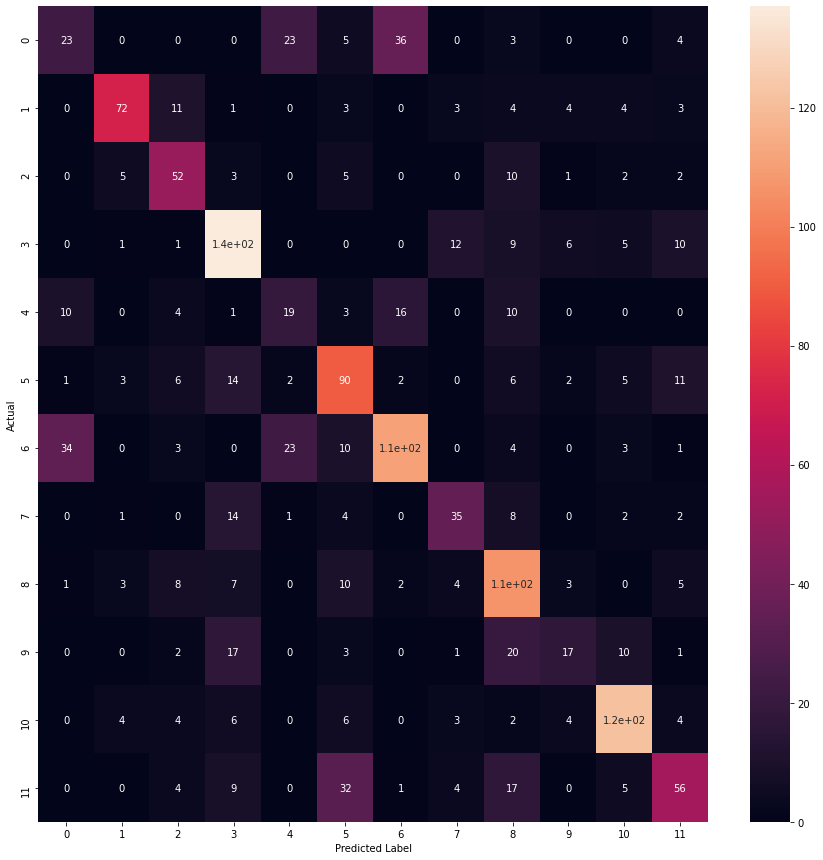

In [20]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual")
plt.show()

**Visualize Predictions**

Predicted Label: [8]


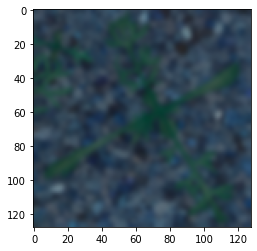

In [21]:
X_test_2 = X_test[2].reshape((1, 128, 128, 3))
test_2_pred = np.argmax(model.predict(X_test_2), axis=1)

print("Predicted Label:", test_2_pred)
plt.imshow(X_test[2])
plt.show()

Predicted Label: [3]


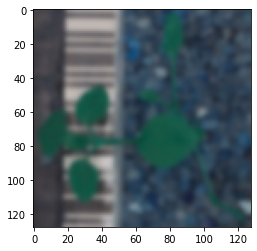

In [22]:
X_test_3 = X_test[3].reshape((1, 128, 128, 3))
test_3_pred = np.argmax(model.predict(X_test_3), axis=1)

print("Predicted Label:", test_3_pred)
plt.imshow(X_test[3])
plt.show()

Predicted Label: [0]


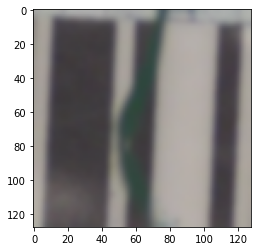

In [23]:
X_test_33 = X_test[33].reshape((1, 128, 128, 3))
test_33_pred = np.argmax(model.predict(X_test_33), axis=1)

print("Predicted Label:", test_33_pred)
plt.imshow(X_test[33])
plt.show()

Predicted Label: [2]


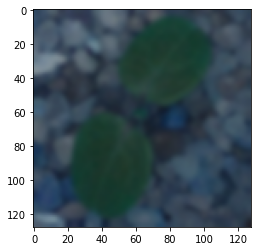

In [24]:
X_test_36 = X_test[36].reshape((1, 128, 128, 3))
test_36_pred = np.argmax(model.predict(X_test_36), axis=1)

print("Predicted Label:", test_36_pred)
plt.imshow(X_test[36])
plt.show()

Predicted Label: [10]


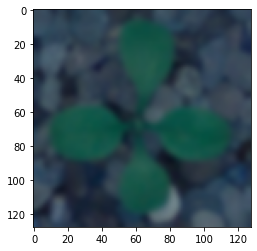

In [25]:
X_test_59 = X_test[59].reshape((1, 128, 128, 3))
test_59_pred = np.argmax(model.predict(X_test_59), axis=1)

print("Predicted Label:", test_59_pred)
plt.imshow(X_test[59])
plt.show()